In [186]:
import numpy as np

In [187]:
class Operation():
    
    def __init__(self, input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
        
        _default_graph.operations.append(self)
    def compure(self):
        pass

In [188]:
class add(Operation):
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var, y_var):
        self.inputs= [x_var,y_var]
        return x_var + y_var

In [189]:
class multiply(Operation):
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var, y_var):
        self.inputs= [x_var,y_var]
        return x_var * y_var

In [190]:
class matmul(Operation):
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var, y_var):
        self.inputs= [x_var,y_var]
        return x_var.dot(y_var)

In [191]:
class Placeholder():
    
    def __init__(self):
        
        self.output_nodes = []
        _default_graph.placeholders.append(self)

In [192]:
class Variable():
    
    def __init__(self,initial_value=None):
        self.value = initial_value
        self.output_nodes = []
        _default_graph.variables.append(self)

In [193]:
class Graph():
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        global _default_graph
        _default_graph = self

z = Ax + B

A = 10
b = =

z = 10x + 1


In [194]:
g = Graph()

In [195]:
g.set_as_default()

In [196]:
A = Variable(10)

In [197]:
b = Variable(1)

In [198]:
x = Placeholder()

In [199]:
y = multiply(A,x)

In [200]:
z = add(y,b)

In [201]:
def traverse_postorder(operation):
    """ 
    PostOrder Traversal of Nodes. Basically makes sure computations are done in 
    the correct order (Ax first , then Ax + b). Feel free to copy and paste this code.
    It is not super important for understanding the basic fundamentals of deep learning.
    """
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [202]:
class Session ():
    def run(self,  operation, feed_dict={}):
        
        nodes_postorder = traverse_postorder(operation)
        for node in nodes_postorder:
            
            if type(node) == Placeholder:
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                node.output = node.value
                
            else:
                #Operation
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs) #args
                
            if type(node.output) ==list:
                node.output = np.array(node.output)
                
        return operation.output
                
        

In [203]:
sess = Session()

In [204]:
result = sess.run(operation=z, feed_dict={x:10})

In [205]:
result

101

In [206]:
g = Graph()
g.set_as_default()

A = Variable([[10,20],[30,40]])
b = Variable([1,2,])
x = Placeholder()
y = matmul(A,x)
z = add(y,b)

In [207]:
sess = Session()

In [208]:
sess.run(operation=z,feed_dict={x:10})

array([[101, 202],
       [301, 402]])

In [209]:
#Classification
##Activation Function


In [210]:
import matplotlib.pyplot as plt
%matplotlib inline

In [211]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [212]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

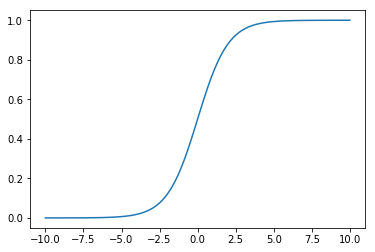

In [213]:
plt.plot(sample_z,sample_a)

In [230]:
class Sigmoid(Operation):
    
    def __init__(self, z):
        super().__init__([z])

    def compute(self,z_val):
        return 1/(1+np.exp(-z_val))

In [215]:
from sklearn.datasets import make_blobs

In [216]:
data = make_blobs(n_samples=50, n_features=2, centers=2,random_state=75)
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [217]:
features = data[0]
labels = data[1]

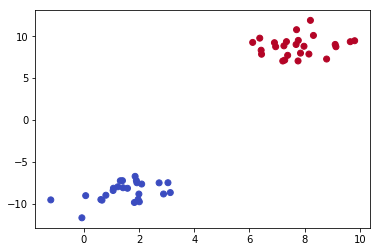

In [218]:
plt.scatter(features[:,0],features[:,1],c=labels, cmap='coolwarm')

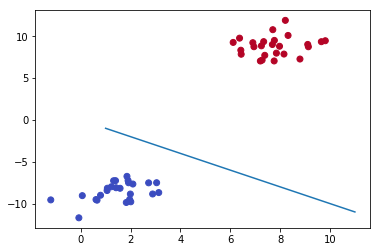

In [219]:
x = np.linspace(1,11,10)
y = -x
plt.scatter(features[:,0],features[:,1],c=labels, cmap='coolwarm')
plt.plot(x,y)

In [220]:
np.array([1,1]).dot(np.array([[8],[10]])) -5

array([13])

In [221]:
np.array([1,1]).dot(np.array([[2],[-10]])) -5

array([-13])

In [222]:
g = Graph()

In [223]:
g.set_as_default()

In [224]:
x = Placeholder()

In [225]:
w = Variable([1,1])

In [226]:
b = Variable(-5)

In [227]:
z = add(matmul(w,x),b)
type(z)

__main__.add

In [231]:
a = Sigmoid(z)

In [ ]:
sess = Session()

In [232]:
sess.run(operation=a,feed_dict={x:[8,10]})

0.99999773967570205

In [233]:
sess.run(operation=a,feed_dict={x:[2,-10]})

2.2603242979035746e-06